# Decision tree
### Basic model

In [49]:
# Import
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, accuracy_score

from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import math
import statistics
import matplotlib.pyplot as plt
import seaborn as sn

from IPython.display import display
from sklearn.model_selection import train_test_split
from data_processing import prepare_data, split_data

In [50]:
data = prepare_data('healthcare-dataset-stroke-data.csv')
# Split the data
train_data, test_data, val_data, train_labels, test_labels, val_labels = split_data(data, split_size=(0.6, 0.2, 0.2))

# Print info
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2945 entries, 2734 to 1800
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     2945 non-null   float64
 1   hypertension            2945 non-null   int64  
 2   heart_disease           2945 non-null   int64  
 3   avg_glucose_level       2945 non-null   float64
 4   bmi                     2945 non-null   float64
 5   female                  2945 non-null   uint8  
 6   male                    2945 non-null   uint8  
 7   other_gender            2945 non-null   uint8  
 8   never_married           2945 non-null   uint8  
 9   ever_married            2945 non-null   uint8  
 10  govt_job                2945 non-null   uint8  
 11  never_worked            2945 non-null   uint8  
 12  private                 2945 non-null   uint8  
 13  self-employed           2945 non-null   uint8  
 14  children                2945 non-null

In [51]:
# train and fit basic model
model = DecisionTreeClassifier()
model.fit(train_data, train_labels)

prediction_train = model.predict(train_data)
prediction_val = model.predict(val_data)
prediction_test = model.predict(test_data)

train_accuracy = accuracy_score(val_labels, prediction)
val_accuracy = accuracy_score(val_labels, prediction)

print(f'train data accuracy: {train_accuracy*100:.4f}')
print(f'validation data accuracy: {val_accuracy*100:.4f}\n')

print(f'balanced accuracy train data: {balanced_accuracy_score(train_labels, prediction_train)*100:.4f} ')
print(f'balanced accuracy validation data: {balanced_accuracy_score(val_labels, prediction_val)*100:.4f} \n')

print('confusion matrix on validation data: ')
print(f'{confusion_matrix(val_labels, prediction_val)} \n')
print('[["True Negative", "False Positive"] \n ["False Negative", "True Positive"]] \n')



train data accuracy: 92.3625
validation data accuracy: 92.3625

balanced accuracy train data: 100.0000 
balanced accuracy validation data: 50.7083 

confusion matrix on validation data: 
[[908  35]
 [ 37   2]] 

[["True Negative", "False Positive"] 
 ["False Negative", "True Positive"]] 



### Parameter optimization options
1. Early stopping &rarr; where to stop
2. Pruning &rarr; cutting leafs
3. Significance thresholding &rarr; stop splitting when information gain is insignificant 

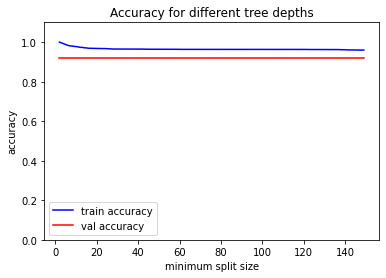

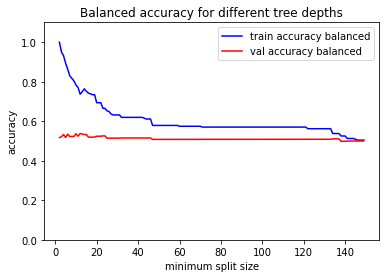

best number of splits: 12
highst validation accuracy: 0.537496261250238


In [57]:
# Option 1. Early stopping: 

# finding the optimal split for early stopping

# Try different minimal split sizes
min_splits = np.arange(2, 150)
train_accuracy = []
val_accuracy = []
train_accuracy_balanced = []
val_accuracy_balanced = []

for i in min_splits:
    # create and fit model
    model = DecisionTreeClassifier(min_samples_split=i)
    model.fit(train_data, train_labels)
    
    # Predict labels
    prediction_train = model.predict(train_data)
    prediction_val = model.predict(val_data)
    
    # Accuracy for training and testing
    train_accuracy.append(accuracy_score(train_labels, prediction_train))
    val_accuracy.append(accuracy_score(val_labels, prediction_test))
    train_accuracy_balanced.append(balanced_accuracy_score(train_labels, prediction_train))
    val_accuracy_balanced.append(balanced_accuracy_score(val_labels, prediction_val))
    

# Plot accuracy for all different splits
plt.plot(min_splits, train_accuracy, 'b')
plt.plot(min_splits, val_accuracy, 'r')
plt.xlabel('minimum split size')
plt.ylabel('accuracy')
plt.legend(['train accuracy', 'val accuracy'])
plt.ylim([0, 1.1])
plt.title('Accuracy for different tree depths')
plt.show()

# Plot accuracy for all different splits
plt.plot(min_splits, train_accuracy_balanced, 'b')
plt.plot(min_splits, val_accuracy_balanced, 'r')
plt.xlabel('minimum split size')
plt.ylabel('accuracy')
plt.legend(['train accuracy balanced', 'val accuracy balanced'])
plt.ylim([0, 1.1])
plt.title('Balanced accuracy for different tree depths')
plt.show()

# Best split:
index_max = val_accuracy_balanced.index(max(val_accuracy_balanced))
print(f'best number of splits: {min_splits[index_max]}')
print(f'highst validation accuracy: {val_accuracy_balanced[index_max]}')

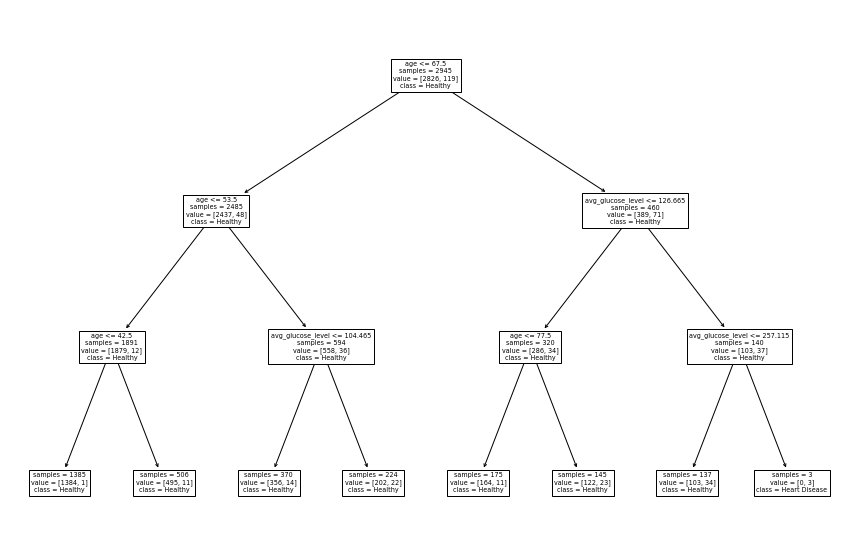

In [53]:
# Plot root of decision tree
d_tree = DecisionTreeClassifier(max_depth=3, min_samples_split=min_splits[index_max])
d_tree.fit(train_data, train_labels)

figure(figsize=(15, 10))
tree.plot_tree(d_tree, feature_names=data.columns.values,
               class_names=['Healthy', 'Heart Disease'], impurity=False);